# Building and Visualizing a Dataset from Twitter

In [218]:
from textblob import TextBlob
import tweepy
import nltk
import re
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 

In [219]:
# Your Twitter app credentials need to be added here - go to https://developer.twitter.com/en/apps
consumer_key = ''
consumer_key_secret = ''
access_token = ''
access_token_secret = ''

In [220]:
twitter_auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)

In [221]:
api = tweepy.API(twitter_auth)

In [222]:
# Let's grab a bunch of tweets
tweets = api.search("cork", count=2500)

In [223]:
# Storing features from the tweets that will be useful for ML later
# This a broken in features relating to the tweet (prefixed with 'tweet_') and use related ones (prefixed with 'user_')
df = pd.DataFrame(columns=('tweet_text', 'tweet_sentiment', 'tweet_subjectivity',
                           'user_followers_count', 'user_friends_count',
                           'user_account_age', 'user_verified',
                           'user_favourites_count', 'user_tweets',
                           'tweet_retweeted', 'tweet_retweet_count', 'tweet_favorite_count'))

# Remove duplicates
df.sort_values("tweet_text", inplace = True) 
df.drop_duplicates(subset ="tweet_text", keep = False, inplace = True) 

# Note: Removing any URL's in the tweet text here also
for tweet in tweets:
    sentimentText = TextBlob(tweet.text)
    df = df.append({'tweet_text': re.sub(r'http\S+', '', tweet.text),
                    'tweet_sentiment': sentimentText.sentiment.polarity,
                    'tweet_subjectivity': sentimentText.sentiment.subjectivity,
                    'user_followers_count': tweet.user.followers_count, 
                    'user_friends_count': tweet.user.friends_count,
                    'user_account_age': tweet.user.created_at,  # TODO: Convert to number of days since account creation
                    'user_verified': tweet.user.verified,
                    'user_favourites_count': tweet.user.favourites_count,
                    'user_tweets': tweet.user.statuses_count,
                    'tweet_retweeted': tweet.retweeted,
                    'tweet_retweet_count': tweet.retweet_count,
                    'tweet_favorite_count': tweet.favorite_count},
                   ignore_index=True)
    
df.head()

,tweet_text,tweet_sentiment,tweet_subjectivity,user_followers_count,user_friends_count,user_account_age,user_verified,user_favourites_count,user_tweets,tweet_retweeted,tweet_retweet_count,tweet_favorite_count
0,RT @fullress: 国内発売中！\nデニム+コルクを使用！\n\nナイキ ドロップ ...,0.00,0.10,2141,2365,2019-09-16 15:01:00,False,92812,62472,False,3,0
1,#OnAir : @deepinside \n14.oo-15.oohrs gmt on G...,0.00,0.00,199,360,2019-02-04 21:18:51,False,352,643,False,0,0
2,いいなーー！！！ #アラサーランク帯,0.00,0.00,31,302,2018-06-22 12:05:40,False,1425,11318,False,0,0
3,RT @theorphanmoon68: If the left want to know ...,0.00,0.00,995,333,2019-03-18 16:24:05,False,66457,48224,False,4,0
4,RT @drcsadlier: Today we disbanded the COVID w...,-0.25,0.25,2680,1164,2014-09-28 00:34:20,False,58811,146602,False,123,0


In [224]:
# Average sentiment of the tweets?
print ("The average sentiment of the tweets is {} ".format(df["tweet_sentiment"].mean()))

The average sentiment of the tweets is 0.05213358585858587 


There are 10553 words in all tweets.
There are 8721 words in  all tweets with stopwords removed.


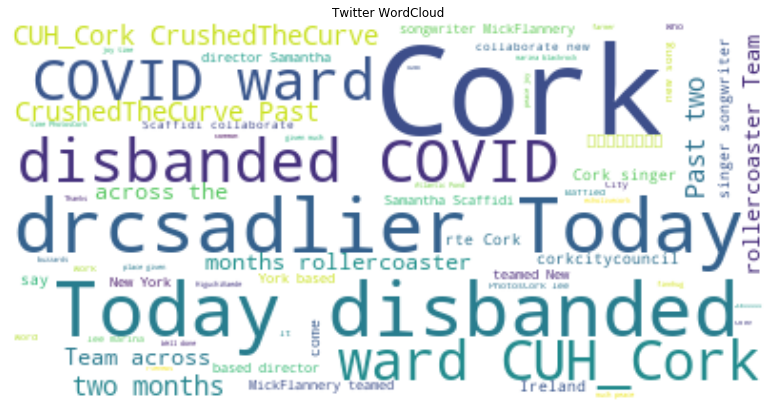

In [225]:
# Setup stop words
stop_words = stopwords.words('english') 
new_stopwords = ['RT']
stop_words.extend(new_stopwords)
stop_words = set(stop_words)

# Remove stopwords
text = " ".join(review for review in df.tweet_text)
clean_text = " ".join(word for word in text.split() if word not in stop_words)

print ("There are {} words in all tweets.".format(len(text)))
print ("There are {} words in  all tweets with stopwords removed.".format(len(clean_text)))

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(clean_text)

plt.figure( figsize=(15,7))
plt.axis("off")
plt.title("Twitter WordCloud")
plt.imshow(wordcloud, interpolation='bilinear')